In [3]:
from datetime import datetime
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from unicodedata import decomposition

rcParams['figure.figsize'] = 10, 6

In [4]:
dataset = pd.read_csv("../Dataset/training_data.csv",index_col=0)

In [5]:
dataset.head()

,Year,Total Multilateral,Total Bilateral,International Monetary Fund,Trade Credit,Total Commercial Borrowings,NRI & FC(B&O) Deposits,Rupee Debt,Total Long-Term Debt
0,1991,40386,27378,5132.0,8374,19727,20030,25199,146226
1,1992,68262,47603,8934.0,12418,35711,27384,31956,232268
2,1993,77758,50258,14985.0,13484,36367,34941,33149,260942
3,1994,82199,54580,15812.0,16307,38782,39729,31634,279043
4,1995,89819,63761,13545.0,20876,40915,39006,30315,298237


In [6]:
dataset.columns

Index(['Year', 'Total Multilateral', 'Total Bilateral',
       ' International Monetary Fund', 'Trade Credit',
       'Total Commercial Borrowings', 'NRI & FC(B&O) Deposits', 'Rupee Debt',
       'Total Long-Term Debt'],
      dtype='object')

In [7]:
dataset = dataset[['Year','Total Long-Term Debt']]

In [10]:
dataset.set_index('Year',inplace=True)

In [11]:
dataset.head()

,Total Long-Term Debt
Year,
1991,146226
1992,232268
1993,260942
1994,279043
1995,298237


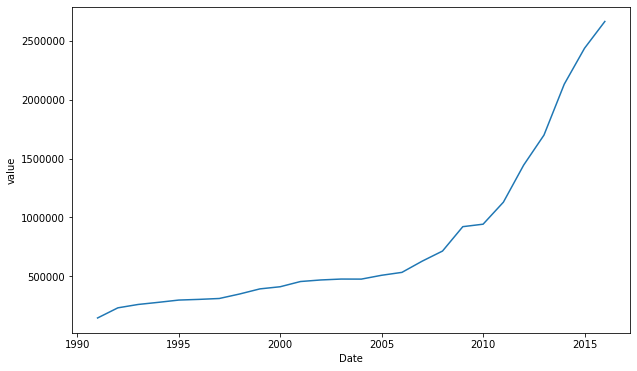

In [14]:
plt.xlabel("Date")
plt.ylabel("value")

plt.plot(dataset)
plt.show()

In [15]:
indexedDataset = dataset

In [29]:
rolemean = indexedDataset.rolling(window=5).mean()

rolstd = indexedDataset.rolling(window=5).std()

print(rolemean,rolstd)

      Total Long-Term Debt
Year                      
1991                   NaN
1992                   NaN
1993                   NaN
1994                   NaN
1995              243343.2
1996              274916.2
1997              290797.4
1998              308559.6
1999              331383.0
2000              354013.2
2001              384336.2
2002              415787.8
2003              441162.0
2004              457771.6
2005              477249.4
2006              492781.6
2007              524749.4
2008              572306.4
2009              661358.6
2010              748093.2
2011              867271.4
2012             1030358.2
2013             1227237.0
2014             1469189.0
2015             1767978.4
2016             2074858.2       Total Long-Term Debt
Year                      
1991                   NaN
1992                   NaN
1993                   NaN
1994                   NaN
1995          59480.949368
1996          29266.902701
1997          20599.822240
1

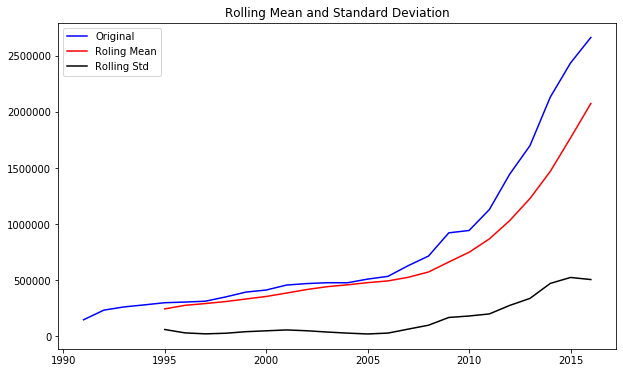

In [30]:
orign = plt.plot(indexedDataset,color='blue',label='Original')
meanplot = plt.plot(rolemean,color='red',label='Roling Mean')
std = plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [31]:
print("Result of Dickey-Fuller Test:")
dftest = adfuller(indexedDataset['Total Long-Term Debt'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number Of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value

print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistics                 6.533975
p-value                         1.000000
#Lags Used                      0.000000
Number Of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


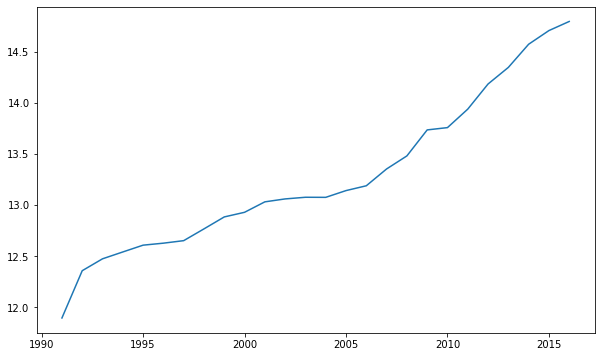

In [32]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

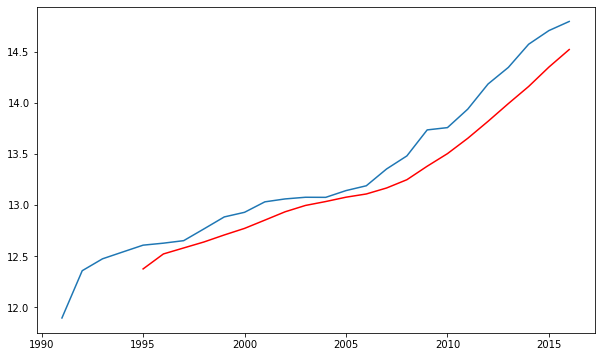

In [33]:
movingaverage = indexedDataset_logScale.rolling(window=5).mean()
movingSTD = indexedDataset_logScale.rolling(window=5).std()

plt.plot(indexedDataset_logScale)
plt.plot(movingaverage,color='red')

In [34]:
dataSetLogScaleMinusMovingAverage = indexedDataset_logScale - movingaverage
print(dataSetLogScaleMinusMovingAverage.head(12))

# remove NAN Values

dataSetLogScaleMinusMovingAverage.dropna(inplace=True)

print(dataSetLogScaleMinusMovingAverage.head(10))

      Total Long-Term Debt
Year                      
1991                   NaN
1992                   NaN
1993                   NaN
1994                   NaN
1995              0.232569
1996              0.105573
1997              0.071390
1998              0.128074
1999              0.176493
2000              0.157484
2001              0.178891
2002              0.125801
      Total Long-Term Debt
Year                      
1995              0.232569
1996              0.105573
1997              0.071390
1998              0.128074
1999              0.176493
2000              0.157484
2001              0.178891
2002              0.125801
2003              0.080171
2004              0.040970


In [75]:
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=2).mean()
    movingSTD = timeseries.rolling(window=2).std()

    orign = plt.plot(timeseries,color='blue',label='Original')
    meanplot = plt.plot(movingAverage,color='red',label='Roling Mean')
    std = plt.plot(movingSTD,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block=False)


    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number Of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value


    print(dfoutput)

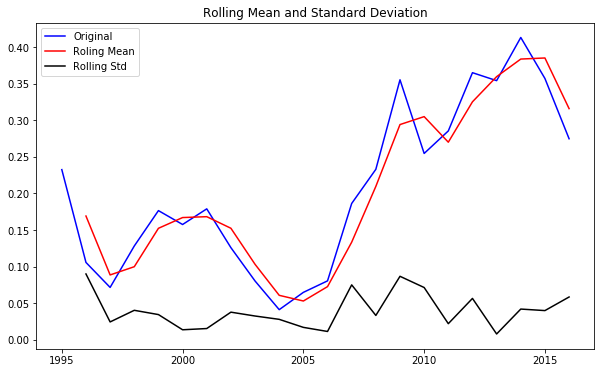

Test Statistics                -1.250551
p-value                         0.651481
#Lags Used                      0.000000
Number Of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [61]:
test_stationarity(dataSetLogScaleMinusMovingAverage)

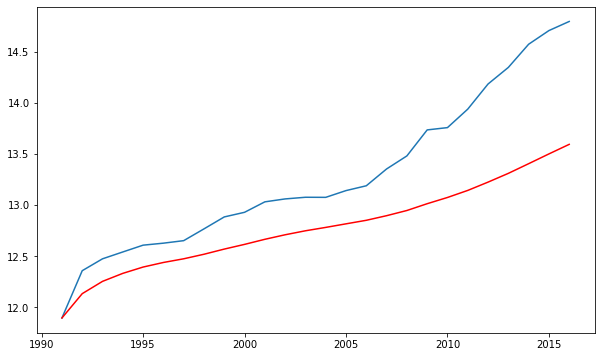

In [62]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust= True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

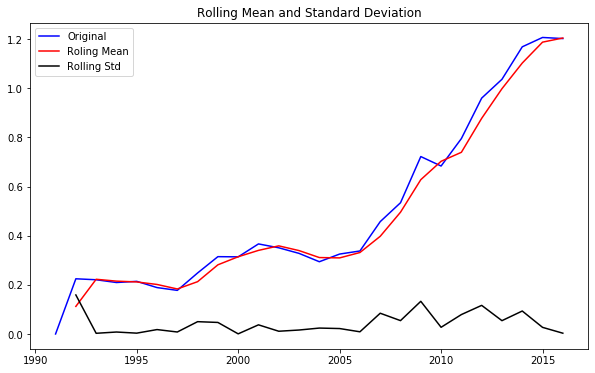

Test Statistics                 0.550393
p-value                         0.986327
#Lags Used                      0.000000
Number Of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [63]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)


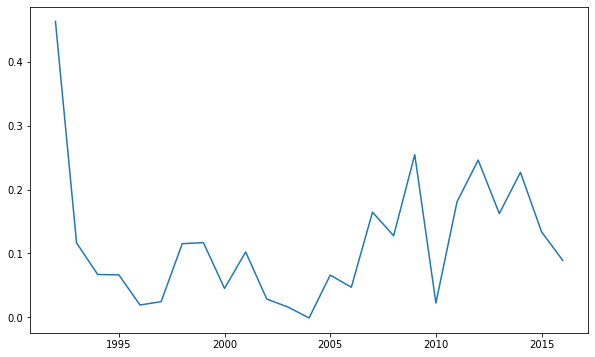

In [64]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

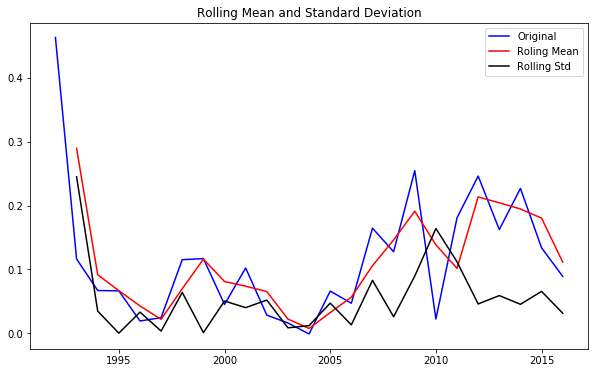

Test Statistics                -2.632693
p-value                         0.086427
#Lags Used                      1.000000
Number Of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [65]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)


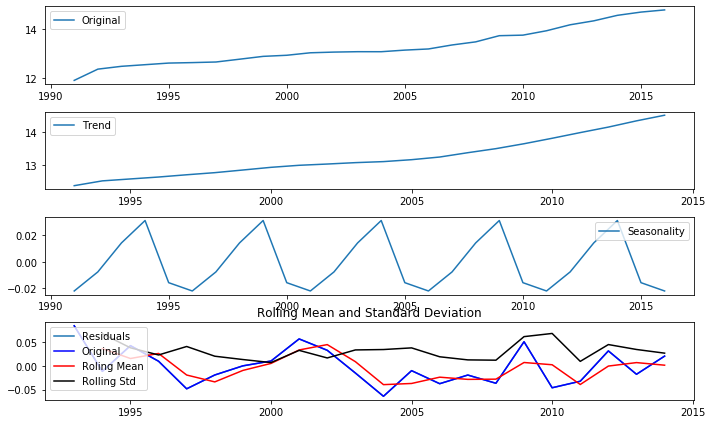

Test Statistics                -2.847947
p-value                         0.051744
#Lags Used                      9.000000
Number Of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexedDataset_logScale,period=5)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(indexedDataset_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

In [ ]:

from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffShifting,nlags=20)
lag_pacf = pacf(datasetLogDiffShifting,nlags=20,method='ols')

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.title('Autocorrelation Function')


# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.title('PArtial Autocorrelation Function')
plt.tight_layout()

In [ ]:






















# ACF and PACF  plots





from statsmodels.tsa.arima_model import ARIMA

# AR MODEL
model = ARIMA (indexedDataset_logScale,order =(2,1,2))
results_ar = model.fit(disp=1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ar.fittedvalues,color ='red')
plt.title('RSS: %.4f'% sum((results_ar.fittedvalues-datasetLogDiffShifting["Value"])**2))
print('Plotting AR Model')

# MA MODEL

Model = ARIMA (indexedDataset_logScale,order =(0,1,2))
results_ma = Model.fit(disp=1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ma.fittedvalues,color ='red')
plt.title('RSS: %.4f'% sum((results_ma.fittedvalues-datasetLogDiffShifting["Value"])**2))
print('Plotting MA Model')


# ARIMA

MoDel = ARIMA (indexedDataset_logScale,order =(2,1,2))
results_arima = MoDel.fit(disp=1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_arima.fittedvalues,color ='red')
plt.title('RSS: %.4f'% sum((results_arima.fittedvalues-datasetLogDiffShifting["Value"])**2))
print('Plotting ARIMA Model')



predictions_ARIMA_diff = pd.Series(results_arima.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

# Convert to cumulative sum

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())


predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Value'].ix[0],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
print(predictions_ARIMA_log.head())

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

# predict

results_arima.plot_predict(1,264)